## **IMPORTS**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# filter methods feature selection
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import chi2_contingency

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier , VotingClassifier
from xgboost import XGBClassifier

# transformer + pipeline
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [3]:
df = pd.read_csv('E:\\fashion_mnist\\fashion-mnist_train.csv.zip')

In [4]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Checking Duplicates columns

In [5]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [6]:
duplicate_col = get_duplicate_columns(df)

In [7]:
duplicate_col

{}

## Spliting Data

In [8]:

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns='label'),df['label'],test_size=0.2,random_state=42)

In [9]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
48572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31766,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,11,37,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0,0,0,0,0,3,7,0,0,0,...,174,180,196,235,0,0,255,229,166,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15795,0,0,0,0,0,0,0,2,0,0,...,94,74,0,0,0,0,0,0,0,0


## *Feature Selection*

----

## Variance Method


In [10]:

sel = VarianceThreshold(threshold=0.05)
sel.fit(X_train)
sum(sel.get_support())
columns = X_train.columns[sel.get_support()]
columns

Index(['pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8',
       'pixel9', 'pixel10', 'pixel11',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=783)

In [11]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [12]:
print(X_train.shape)
print(X_test.shape)

(48000, 783)
(12000, 783)


## Chi-Square

#### Hypothesis test which helps in selecting most favorable categorical features.

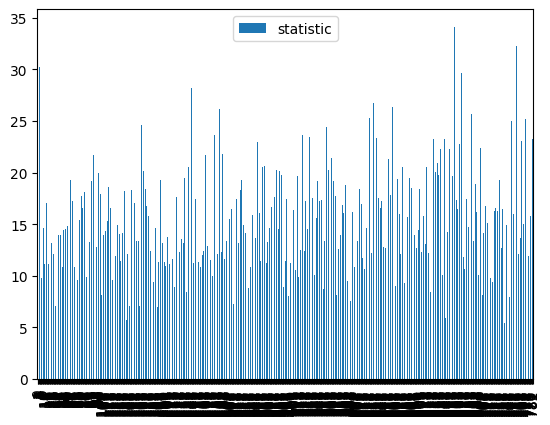

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

score = []
for feature in X_train.columns:
    # To divide values in categories applying binning  
    discretized = pd.cut(X_train[feature],bins=[-1, 85, 170, 255], labels=['low','medium','high'])
    ct = pd.crosstab(y_train, discretized)
    chi2_stat, p, dof, expected = chi2_contingency(ct)
    score.append({"statistic": chi2_stat, "pvalue": p})

temp_df = pd.DataFrame(score)
temp_df.plot(kind='bar', y='statistic')
plt.show()


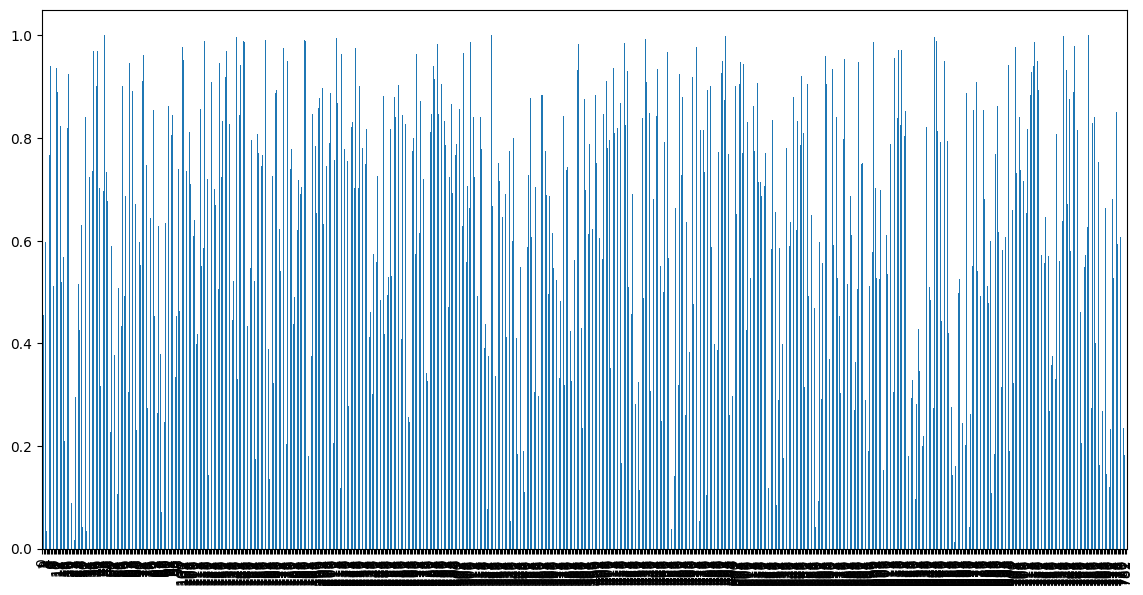

In [14]:
plt.figure(figsize=(14,7))
temp_df['pvalue'].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [15]:
columns_name = X_train.columns

drop_cols = [col for col,p in zip(columns_name,temp_df['pvalue']) if p>0.95]

In [16]:
X1_train = X_train.drop(columns=drop_cols)
X1_test = X_test.drop(columns=drop_cols)
print(X1_train.shape)
print(X1_test.shape)

(48000, 725)
(12000, 725)


## Model Training



----

## ***RandomForest***

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X1_train,y_train)
pred = rfc.predict(X1_test)
accuracy_score(y_test,pred)

0.8778333333333334

## **Voting Ensemble**

In [18]:
voter = VotingClassifier(estimators=[
    ('one',RandomForestClassifier(random_state=42)),
    ('two',AdaBoostClassifier(random_state=42)),
    ('three',XGBClassifier(random_state=42))
],voting='soft',n_jobs=-1)
voter.fit(X1_train,y_train)

,estimators,"[('one', ...), ('two', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,-1
,flatten_transform,True
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [19]:
y_pred = voter.predict(X1_test)
accuracy_score(y_test,y_pred)

0.8973333333333333

## **XGBoost**

In [20]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X1_train,y_train)
pred = xgb.predict(X1_test)
accuracy_score(y_test,pred)

0.9001666666666667

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1232
           1       1.00      0.97      0.98      1174
           2       0.83      0.85      0.84      1200
           3       0.89      0.93      0.91      1242
           4       0.82      0.85      0.83      1185
           5       0.98      0.97      0.97      1141
           6       0.76      0.68      0.71      1243
           7       0.96      0.97      0.96      1224
           8       0.97      0.98      0.97      1149
           9       0.97      0.96      0.97      1210

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



-----

## ***Pipeline***

In [22]:
class variance(BaseEstimator,TransformerMixin):
  def __init__(self):
    self.threshold  = 0.05
    self.Sel = None
    self.column = None
  def fit(self,X_train,y_train=None):
    self.Sel = VarianceThreshold(threshold=self.threshold)
    self.Sel.fit(X_train)
    self.column = X_train.columns[self.Sel.get_support()]
  
    return self
  
  def transform(self,X_train,y_train=None):
    columns = X_train.columns
    index = X_train.index
    X_train = self.Sel.transform(X_train)
    return pd.DataFrame(X_train, columns=columns, index=index)

In [23]:
class CHI_Square(BaseEstimator,TransformerMixin):
 def __init__(self):
  self.score = []
  self.temp_df=None

 def fit(self,X_train,y_train):
  for feature in X_train.columns:
    discretized = pd.cut(X_train[feature],bins=[-1, 85, 170, 255], labels=['low','medium','high'])
    ct = pd.crosstab(y_train, discretized)
    chi2_stat, p, dof, expected = chi2_contingency(ct)
    score.append({"statistic": chi2_stat, "pvalue": p})

  return self
 
 def transform(self,X_train,y_train=None):
  temp_df = pd.DataFrame(score)
  columns_name = X_train.columns
  drop_cols = [col for col,p in zip(columns_name,temp_df['pvalue']) if p>0.95]
  X_train = X_train.drop(columns=drop_cols)
  return X_train

In [24]:
num_cols = list(range(X_train.shape[1]))

In [25]:

trf2 = ColumnTransformer([
    ('chi_square',CHI_Square(),num_cols)
],remainder='passthrough')


In [26]:
pipe = Pipeline([
    ('variance',variance()),
    ('chi_square',trf2),
    ('XGB',XGBClassifier())
])

In [27]:
pipe.fit(X_train,y_train)

,steps,"[('variance', ...), ('chi_square', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('chi_square', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [28]:
y_pred = pipe.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9001666666666667


-----